In [161]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()
city_data.tail()
ride_data.head()
ride_data.tail()
city_data.columns
ride_data.columns
# Combine the data into a single dataset
merged_city_ride = pd.merge(ride_data,city_data, how = "left", on = "city")
# Display the data table for preview
merged_city_ride.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [170]:
merged_df = merged_city_ride.copy()
merged_df_grouped = merged_df.groupby(['city','type']).agg({'ride_id': [np.count_nonzero], 'fare': [np.mean],
                                     'driver_count':[np.sum]})
merged_df_grouped.head()

,,ride_id,fare,driver_count
,,count_nonzero,mean,sum
city,type,,,
Amandaburgh,Urban,18,24.641667,216
Barajasview,Urban,22,25.332273,572
Barronchester,Suburban,16,36.422500,176
Bethanyland,Suburban,18,32.956111,396
Bradshawfurt,Rural,10,40.064000,70


## Bubble Plot of Ride Sharing Data

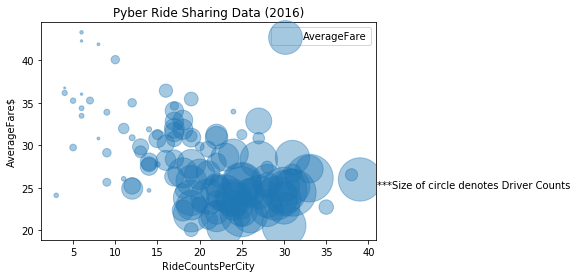

In [172]:
# Obtain the x and y coordinates for each of the three city types
merged_df_grouped = merged_df.groupby(['city','type']).agg({'ride_id': [np.count_nonzero], 'fare': [np.mean],
                                     'driver_count':[np.sum]})

merged_df_grouped.columns = ['RideCounts','AverageFare','DriverCount']



# Build the scatter plots for each city types

plt.scatter(merged_df_grouped['RideCounts'],merged_df_grouped['AverageFare'],
            #trying to iterate through each item with list comp but struggling: col = [x for x in merged_df_grouped['type']],
            s = merged_df_grouped['DriverCount'],alpha = 0.4)



         
# Incorporate the other graph properties
plt.xlabel("RideCountsPerCity")
plt.ylabel("AverageFare$")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc = "best")
# Create a legend


# Incorporate a text label regarding circle size

plt.text(41,25,"***Size of circle denotes Driver Counts")

# Save Figure
plt.savefig('BubbleRideSharing_city_type.png') 

In [30]:
# Show plot
plt.show()

## Total Fares by City Type

              fare
               sum
type              
Rural     0.068115
Suburban  0.304639
Urban     0.627246


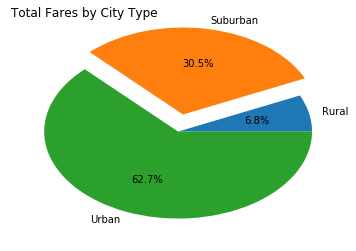

In [155]:
# Calculate Type Percents
merged_df_grouped_fare = merged_df.groupby(['type']).agg({'fare': [sum]})

merged_df_grouped_fare.apply(lambda x: x / x.sum())
print(merged_df_grouped_fare.apply(lambda x: x / x.sum()))
# Build Pie Chart
explode = (0,.2,0)
labels = 'Rural', 'Suburban', 'Urban'
plt.pie(merged_df_grouped_fare, explode = explode, labels = labels, autopct='%1.1f%%')

plt.title('Total Fares by City Type', loc = 'left')
# Save Figure
plt.savefig('Fares_by_city_type.png') 

In [154]:
# Show Figure
plt.show()

## Total Rides by City Type

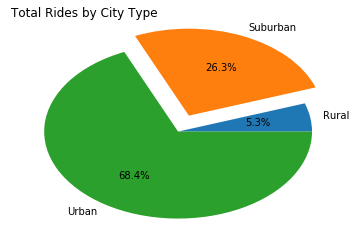

In [152]:
# Calculate Ride Percents
merged_df_grouped_ride = merged_df.groupby(['type']).agg({'ride_id': [np.count_nonzero]})
merged_df_grouped_ride.apply(lambda x: x / x.sum())
# Build Pie Chart
explode_2 = 0,.2,0

labels = 'Rural', 'Suburban', 'Urban'
plt.pie(merged_df_grouped_ride, explode = explode_2, labels = labels, autopct='%1.1f%%')

plt.title('Total Rides by City Type', loc = 'left')
# Save Figure
plt.savefig('Rides_city_type.png') 

In [153]:
# Show Figure
plt.show()

## Total Drivers by City Type

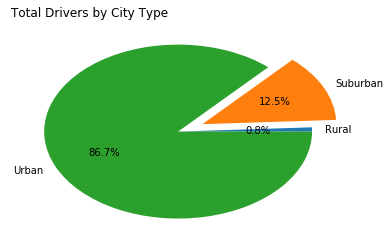

In [151]:
# Calculate Driver Percents
merged_df_grouped_driver = merged_df.groupby(['type']).agg({'driver_count': [np.sum]})
merged_df_grouped_driver.apply(lambda x: x / x.sum())
# Build Pie Charts

explode_3 = 0,.2,0

labels = 'Rural', 'Suburban', 'Urban'
plt.pie(merged_df_grouped_driver, explode = explode_3, labels = labels, autopct='%1.1f%%')

plt.title('Total Drivers by City Type', loc = 'left')
# Save Figure
plt.savefig('Drivers_city_type.png') 

In [171]:
# Show Figure
plt.show()

In [ ]:
""""Based on analysis of the data, there are several takeaways:
    
First, most rivers work in Urban areas which is no surprise: as a corlollary, most rides and fare spend
are in urban areas. When stratifying by city type specifcially looking at drivers, 86.7% of drivers were in Urban 
areas whereby only 0.8% were in Rural areas and 12.5% in Suburban areas. When analyzing rides by city type, 68.4% were found in Urban areas vs 26.3% in Suburban and the remainder in Rural at 5.3%. However, when we look
at fares by city type, there is an economies of scale effect. Since there is such a larger volume of rides in the Urban
and Suburban areas, the average fare drops for the aforementioend areas. Rural areas have starkly higher fares."""
